In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from keras.datasets import mnist

In [2]:
(x_train, _), (x_test, _) = mnist.load_data()

In [3]:
X_train = x_train.astype('float32')/255
X_test = x_test.astype('float32')/255

print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [4]:
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print(X_train.shape, X_test.shape)

(60000, 28, 28, 1) (10000, 28, 28, 1)


In [5]:
noise_factor = 0.5

X_train_noisy = X_train + noise_factor*np.random.normal(0.0, 1.0, X_train.shape)
X_test_noisy = X_test + noise_factor*np.random.normal(0.0, 1.0, X_test.shape)

In [6]:
X_train_noisy = np.clip(X_train_noisy, 0., 1.)
X_test_noisy = np.clip(X_test_noisy, 0., 1.)

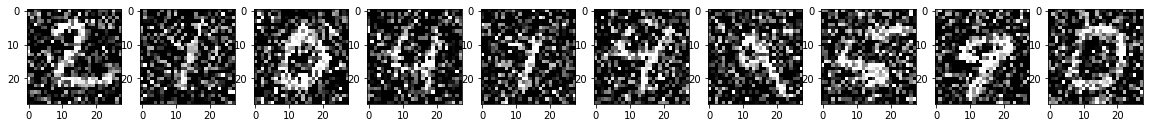

In [7]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n+1):
    sp = plt.subplot(1, n, i)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
plt.show()

In [8]:
from keras.models import Model
from keras.layers import Input, Conv2D, MaxPool2D, UpSampling2D

In [9]:
# encoder
input_img = Input(shape=(28, 28, 1))

x = Conv2D(32, (3,3), activation='relu', padding='same')(input_img)
#(28, 28, 32)
x = MaxPool2D((2, 2))(x)
#(14, 14, 32)
x = Conv2D(32,(3, 3), activation='relu', padding='same')(x)
#(14, 14, 32)
encoded = MaxPool2D((2, 2))(x)
#(7, 7, 32)

In [10]:
# decoder
x = Conv2D(32,(3, 3), activation='relu', padding='same')(encoded)
#(7, 7, 32)
x = UpSampling2D((2, 2))(x)
#(14, 14, 32)
x = Conv2D(32,(3, 3), activation='relu', padding='same')(x)
#(14, 14, 32)
x = UpSampling2D((2, 2))(x)
#(28, 28, 32)
decoded = Conv2D(1,(3, 3), activation='sigmoid', padding='same')(x)

In [11]:
autoencoder = Model(input_img, decoded)

In [12]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [ ]:
autoencoder.fit(X_train_noisy, X_train,
               batch_size=128,
               epochs=10,
               shuffle=True,
               validation_data=(X_test_noisy, X_test))

Epoch 1/10
469/469 [==============================] - 134s 286ms/step - loss: 0.6101 - val_loss: 0.5582
Epoch 2/10
469/469 [==============================] - 134s 287ms/step - loss: 0.5237 - val_loss: 0.5109
Epoch 3/10
469/469 [==============================] - 134s 287ms/step - loss: 0.5025 - val_loss: 0.5018
Epoch 4/10
469/469 [==============================] - 135s 287ms/step - loss: 0.4938 - val_loss: 0.4932
Epoch 5/10
469/469 [==============================] - 129s 276ms/step - loss: 0.4853 - val_loss: 0.4846
Epoch 6/10
469/469 [==============================] - 129s 276ms/step - loss: 0.4767 - val_loss: 0.4757
Epoch 7/10
469/469 [==============================] - 129s 275ms/step - loss: 0.4676 - val_loss: 0.4661
Epoch 8/10
469/469 [==============================] - 128s 274ms/step - loss: 0.4575 - val_loss: 0.4552
Epoch 9/10
469/469 [==============================] - 128s 273ms/step - loss: 0.4459 - val_loss: 0.4424
Epoch 10/10
462/469 [============================>.] - ETA: 1s -

In [21]:
de_noised_images = autoencoder.predict(X_test_noisy[:10])

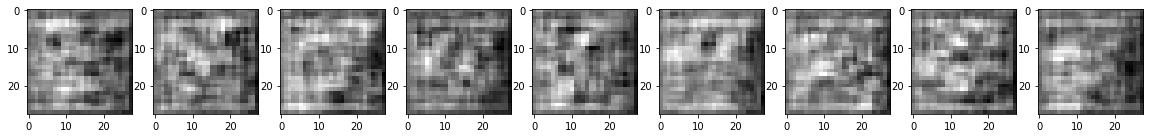

In [22]:
n = 9
plt.figure(figsize=(20, 2))
for i in range(1, n+1):
    plt.subplot(1, n, i)
    plt.imshow(de_noised_images[i].reshape(28, 28))
    plt.gray()
plt.show()

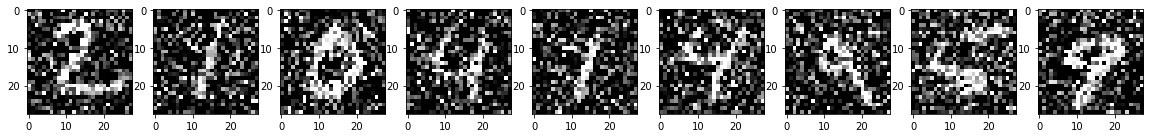

In [23]:
n =9
plt.figure(figsize=(20, 2))
for i in range(1, n+1):
    plt.subplot(1, n, i)
    plt.imshow(X_test_noisy[i].reshape(28, 28))
    plt.gray()
plt.show()